In [1]:
%matplotlib inline
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set()

In [2]:
ticker=["META","AMZN","NFLX","GOOG"]

stocks_data=yf.download(ticker,start="2025-01-01",end="2025-07-01")

C:\Users\Aditya Kumar Singh\AppData\Local\Temp\ipykernel_16808\2632214674.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stocks_data=yf.download(ticker,start="2025-01-01",end="2025-07-01")
[*********************100%***********************]  4 of 4 completed


In [3]:
stocks=pd.read_csv("stocks_data.csv",header=[0,1],index_col=[0],parse_dates=[0])

In [4]:
stocks.columns=pd.MultiIndex.from_tuples(stocks.columns)

In [5]:
close=stocks.loc[:,"Close"].copy()
close

,AMZN,GOOG,META,NFLX
Date,,,,
2025-01-02,220.220001,190.184464,598.247009,886.729980
2025-01-03,224.190002,192.678635,603.628052,881.049988
2025-01-06,227.610001,197.497345,629.155762,881.789978
2025-01-07,222.110001,196.250259,616.866150,879.190002
2025-01-08,222.130005,194.933350,609.708008,875.000000
...,...,...,...,...
2025-06-24,212.770004,167.740005,712.200012,1279.109985
2025-06-25,211.990005,171.490005,708.679993,1275.250000
2025-06-26,217.119995,174.429993,726.090027,1306.670044


In [6]:
stock=stocks["Close"].copy()
ret=stock.pct_change().dropna()

In [7]:
ret.cov()

,AMZN,GOOG,META,NFLX
AMZN,0.000587,0.000388,0.000568,0.000291
GOOG,0.000388,0.000508,0.000397,0.000205
META,0.000568,0.000397,0.000750,0.000352
NFLX,0.000291,0.000205,0.000352,0.000543


In [8]:
ret.corr()

,AMZN,GOOG,META,NFLX
AMZN,1.000000,0.710832,0.855545,0.515980
GOOG,0.710832,1.000000,0.643817,0.391099
META,0.855545,0.643817,1.000000,0.551789
NFLX,0.515980,0.391099,0.551789,1.000000


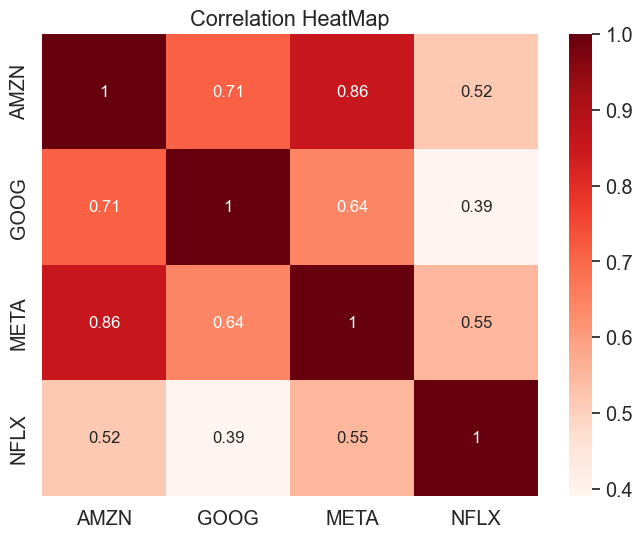

In [21]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.3)
sns.heatmap(ret.corr(),cmap="Reds",annot=True,annot_kws={"size":12},vmax=1)
plt.title("Correlation HeatMap")
plt.show()

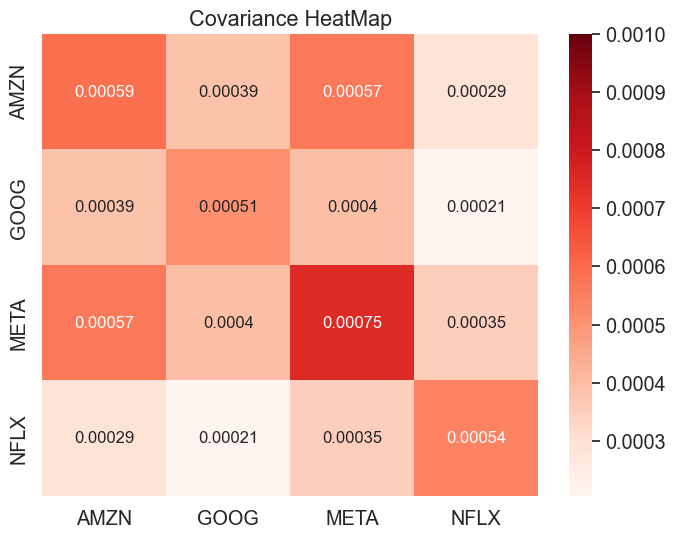

In [29]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.3)
sns.heatmap(ret.cov(),cmap="Reds",annot=True,annot_kws={"size":12},vmax=0.001)
plt.title("Covariance HeatMap")
plt.show()